In [7]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

Preprocess textual data for summarization.

In [8]:
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [12]:
df = pd.read_csv("train.csv", quoting=3, on_bad_lines='skip')

In [14]:
df.describe()

,article,highlights
count,24,10
unique,24,10
top,of North Dakota,is taking time off after being diagnosed .
freq,1,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2765 entries, ('0001d1afc246a7964130f43ae940af6bc6c57f01', '"By . Associated Press . PUBLISHED: . 14:11 EST', ' 25 October 2013 . | . UPDATED: . 15:36 EST', ' 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo', ' Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo', ' Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low', " but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatit

In [13]:
# Drop the 'id' column if it exists
if 'id' in df.columns:
    df = df.drop(columns=['id'])

In [17]:
df = df.reset_index(drop=True)
# Select a sample article and its reference summary
article = df.loc[0, 'article']
reference_summary = df.loc[0, 'highlights']

### **1. Extractive Summarization **
Implement extractive summarization

In [31]:
def extractive_summary(text, num_sentences=2):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LexRankSummarizer()
    summary = summarizer(parser.document, num_sentences)
    return " ".join([str(sentence) for sentence in summary])


### **2. Abstractive Summarization (Using Hugging Face Transformers)**
Implement abstractive summarization using pre-trained models like BERT or GPT with HuggingFace's transformers.

In [33]:
# Load Hugging Face Summarization Model (BART or T5)
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

Device set to use cpu


In [34]:
def abstractive_summary(text, model_name="facebook/bart-large-cnn"):
    summarizer = pipeline("summarization", model=model_name)
    summary = summarizer(text, max_length=50, min_length=20, do_sample=False)
    return summary[0]["summary_text"]
    return summary[0]["summary_text"]

In [19]:
# Generate summary
generated_summary = summarizer(article, max_length=130, min_length=30, do_sample=False)[0]['summary_text']


Your max_length is set to 130, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


In [20]:
# Convert summaries into sets of words for comparison
stop_words = set(stopwords.words('english'))

In [21]:
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    return set([word for word in words if word.isalnum() and word not in stop_words])  # Remove stopwords & special chars


In [23]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab', quiet=True)

# Now, you can use word_tokenize and sent_tokenize

True

In [24]:
reference_words = preprocess_text(reference_summary)
generated_words = preprocess_text(generated_summary)

In [25]:
# Compute Confusion Matrix Values
true_positive = len(reference_words & generated_words)

In [26]:
# Correctly summarized words
false_positive = len(generated_words - reference_words)

In [27]:
# Extra words not in reference summary
false_negative = len(reference_words - generated_words)

Test the model on real-world articles and evaluate summary coherence.


In [28]:
 #Missing words

# Construct Confusion Matrix
conf_matrix = np.array([[true_positive, false_negative], [false_positive, 0]])

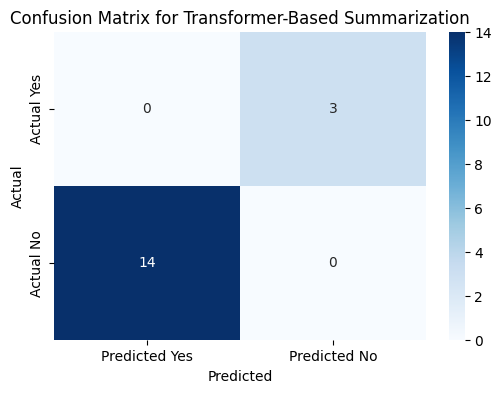

In [29]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Yes", "Predicted No"], yticklabels=["Actual Yes", "Actual No"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Transformer-Based Summarization")
plt.show()

In [30]:
# Print Summaries
print("\nGenerated Summary:\n", generated_summary)
print("\nReference Summary:\n", reference_summary)


Generated Summary:
 The state of North Dakota is one of the most conservative states in the United States. The state is home to a large number of oil and natural gas reserves.

Reference Summary:
  is taking time off after being diagnosed .
